# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: ANOVA
### VIDEO: One-way ANOVA (independent samples)
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

c:\anaconda\envs\pytorch2023\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
## data parameters

# 3 different groups with the following means:
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples per group, data points in each group, illustrates code can handle different sample sizes
N1 = 30
N2 = 35
N3 = 29

# standard deviation (assume and use this across all groups)
stdev = 2 # this is just arbitrary, you could make variance different for each group if you wanted


In [10]:
## now to simulate the data
# normally distributed nums stretched to the std dev and shifted according to the mean
data1 = mean1 + np.random.randn(N1)*stdev 
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

arr1 = np.array([1,2,3])
arr2 = np.array([4,5,6])
stacked = np.hstack((arr1,arr2))


# horizontally stack (hstack) the above into one long vector (can plug into one col in below dataframe that way)
datacolumn = np.hstack((data1,data2,data3)) # hstack spreads the arrays side by side into one big array

# group labels
groups = ['1']*N1 + ['2']*N2 + ['3']*N3 # repeats the number 1 N1 times, 2 N2 times etc.
# this will make the group number line up with the number of rows for it

# convert to a pandas dataframe - with two cols: TheData and Group
df = pd.DataFrame({'TheData':datacolumn,'Group':groups})
df

,TheData,Group
0,5.557294,1
1,5.479974,1
2,4.017227,1
3,1.496745,1
4,7.214775,1
...,...,...
89,11.861478,3
90,8.848169,3
91,7.050171,3
92,7.033148,3


In [11]:
# use anova from pengouin package. 
# the data comes from the dataframe - specify the dependent variable dv as the data col
# the between groups factor is the Group col in above dataframe  
pg.anova(data=df,dv='TheData',between='Group') # note: shows a condensed version of the anova table

# this shows the Source as Group Effect - the Between Groups Effect
# ddof1 is 2 because we have 3 conditions (3-1 for the numerator gives us 2)
# ddof2 or the denominator degrees of freedom is 91 because we have 94 subjects total and 3 groups (N-k)
# 

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,91,30.51628,7.215519e-11,0.401444


In [12]:
pg.pairwise_tukey(data=df,dv='TheData',between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,3.450145,3.638560,-0.188415,0.549529,-0.342866,9.373017e-01,-0.082383
1,1,3,3.450145,7.401053,-3.950907,0.575168,-6.869131,2.332928e-09,-1.683527
2,2,3,3.638560,7.401053,-3.762492,0.554607,-6.784065,3.451476e-09,-1.813458


<Axes: title={'center': 'TheData'}, xlabel='Group'>

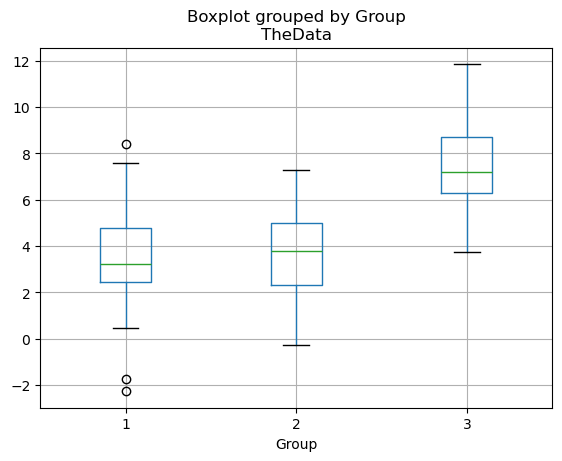

In [13]:
df.boxplot('TheData',by='Group') # datafrane box plot separated by group col - we pass in the df data col
# you want to visualize the data after the anova.
# shows how we simulated data - group 1 has mean of 4, group 2 has mean of 3.8, group 3 has mean of 7

In [14]:
## Multiple Comparisons in 1way ANOVAs using Tukey test

# use the pengouin pairwise_tukey function
pg.pairwise_tukey(data=df,dv='TheData',between='Group')

# the table will show rows corresponding to different comparisons and differences between each group to one another
# the average of the two conditions/levels are mean(A) and mean(B)
# The most important col is the p-tukey (p-value)
  # Example if p-tukey is 0.24...(24%) in first row, it means groups 1 and 2 are not significantly different from each other 
  # if row 2 shows p-tukey as .001.. then this means groups 1 and 3 are significantly different from each other
# note if the number has e-01 at the end it is scientific notation and means you move the decimal over one place to left - if e-3, move 3 places to left etc.
# expected result is row one will have a higher p-value since groups 1 and 2 have very close means.

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,3.450145,3.638560,-0.188415,0.549529,-0.342866,9.373017e-01,-0.082383
1,1,3,3.450145,7.401053,-3.950907,0.575168,-6.869131,2.332928e-09,-1.683527
2,2,3,3.638560,7.401053,-3.762492,0.554607,-6.784065,3.451476e-09,-1.813458
